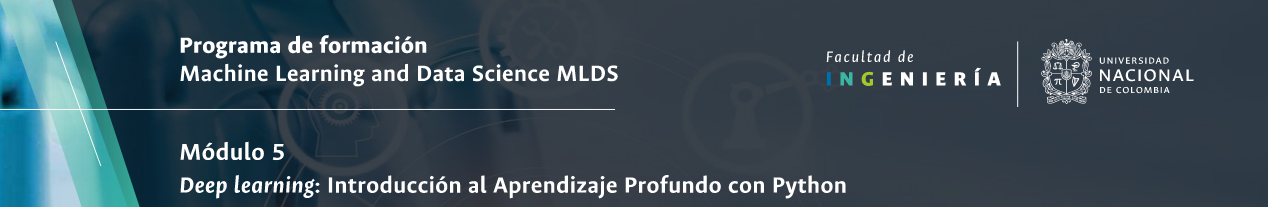



# **Proyecto Aplicado, Módulo 5 del programa de formación de Machine Learning and Data Sciencie MLDS**
---

**Estudiante: Daniel Trillos Navarro**

## **1. Marco de Proyecto**
---

Normalmente, se suele construir un marco de proyecto para mostrar los resultados del entendimiento del negocio, es decir, debemos dar respuesta a los siguientes elementos:

### **1.1. Trasfondo del Negocio**
---

- ¿Quién es el cliente o los beneficiarios del proyecto? ¿En qué dominio se encuentran (marketing, medicina, entre otros)?
- ¿Qué problemas del negocio o del dominio estamos tratando de solucionar?

El proyecto no tiene un cliente como tal, se realiza como una actividad de tipo educativo para aplicar técnicas de deep learning. 

Son datos financieros producto de transacciones con tarjeta de crédito.

Se busca ajustar un modelo de aprendizaje profundo que permita estimar si una transacción con tarjeta de crédito es fraudulenta o no para una entidad financiera.

### **1.2. Alcance**
---

- ¿Qué  solución basada en _Deep Learning_ queremos implementar?
- ¿Qué  se hará?
- ¿De qué forma el cliente o beneficiario utilizará el producto del proyecto?

Utilizar tensorflow y keras para ajustar un modelo de aprendizaje profundo que permita estimar si una transacción con tarjeta de crédito es fraudulenta o no para una entidad financiera.

Ajustar un modelo que permita estimar el fraude en las transacciones.

Dado que no hay un cliente como tal, si se puede decir que este tipo de modelos son muy importantes en el sector financiero para monitorear el riesgo de fraude por transacciones con tarjeta de crédito.

### **1.3. Plan**
---

Puede agregar una lista de actividades con tiempos estimados, un diagrama de Gantt o integrar alguna herramienta de gestión de proyectos para mostrar la planeación del proyecto.

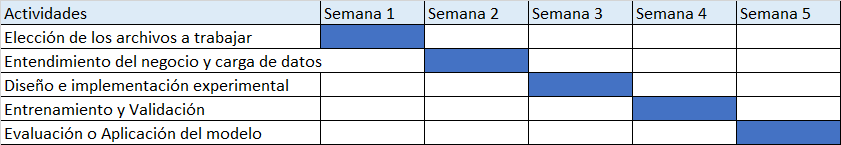

## **2. Datos**
---

En esta sección debe adjuntar una descripción de los datos y agregar el código que permite su tratamiento.

### **2.1. Origen**
---

- ¿De dónde vienen los datos?
- ¿Se usa alguna herramienta o proceso para la descarga de la información?
- ¿Qué tipo de datos estamos manejando?

Los datos fueron extraídos de kaggle.
No se utilizó ninguna herramienta, se descargó directamente desde la página de kaggle.
Los datos son de tipo númerico y corte transversal


### **2.2. Carga o Adquisición de Datos**
---

Agregue el código necesario en _Python_ para obtener o cargar los datos.

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
import tensorflow as tf
%load_ext tensorboard
import tensorboard
tensorboard.__version__
import matplotlib.pyplot as plt
from datetime import datetime

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [120]:
df = pd.read_csv('/content/creditcard.csv', sep=';')


In [121]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Entendimiento y Preparación de los Datos**
---


## **3. Análisis Exploratorio de los Datos**
---

Normalmente en el análisis exploratorio, se trata de dar respuesta a los siguientes elementos:

### **3.1. Resumen General**
---

- ¿Cuántos documentos tiene el dataset?
- ¿En qué formato están guardados los datos?
- ¿Qué tamaño en MB tiene el conjunto?

El dataset esta compuesto por 31 columnas con 284.806 registros.

El archivo en el cual están es de tipo csv.

El tamaño del conjunto de datos es de 67.4 MB. Esto se puede verificar a continuación:

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### **3.2. Resumen de la Calidad de los datos**
---

- ¿Hay datos faltantes, documentos vacíos o de mala calidad?
- ¿Existen documentos ilegibles o con problemas de codificación?
- ¿Hay mezcla de formatos en el conjunto?

Se procedió a verificar si hay datos faltantes y se encontró que no, a continuación, se puede ver el resultado.

No existes datos ilegibles o con problemas de codificación.

Los datos de las diferentes variables están en un formato igual y por lo tanto no se evidencia mezcla de formatos.

In [123]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

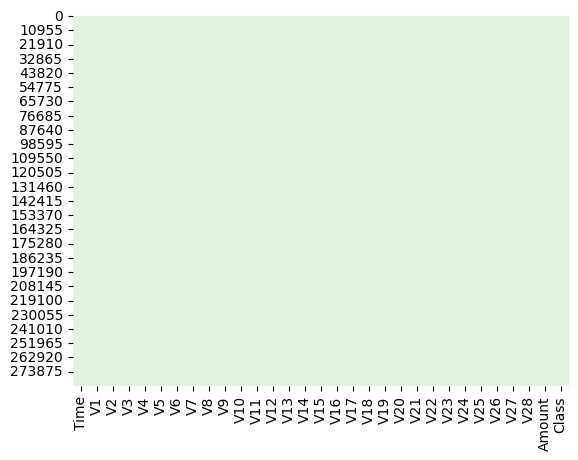

In [124]:
colormap = sns.color_palette("Greens")
sns.heatmap(df.isnull(), cbar=False,cmap=colormap)

### **3.3. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?
- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.
- ¿El conjunto de datos cuenta con otras variables adicionales?, de ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.

Si, existe la variable objetivo "Class", es categorica y contiene los valores 0 y 1, 0 indica que son transacciones normales y 1 para aquella transacciones fraudulentas.

La variable Class muestra que hay desbalanceo en los datos, esto en razón a que en el grupo 0 esta el mayor porcentaje de las observaciones 284.315 que equivalen al 99.83%, mientras que en el 1 hay 492 que equivalen al 0.17%.

El conjunto de datos cuenta con otras variables, en total son 31, por lo tanto, al excluir la variable objetivo quedan 30 variables que serán utilizadas para el ajuste del modelo.

Se presentan los resultados de las medidas de tendencia central y también un boxplot múltiple, en este último se puede evidenciar la presencia de algunos datos atípicos, sin embargo, en general se observa un comportamiento normal en la mayor parte de las variables.

A continuación se presenta la descripción de la variable Class y la evidencia de su desbalanceo

In [125]:
df['Class'].unique()

array([0, 1])

In [126]:
cuenta = df.Class.value_counts()
print(cuenta)
print(f'legimate {(cuenta[0] / sum(cuenta))*100}% and Fraudent {(cuenta[1] / sum(cuenta))*100}%')

0    284315
1       492
Name: Class, dtype: int64
legimate 99.82725143693798% and Fraudent 0.1727485630620034%


In [127]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


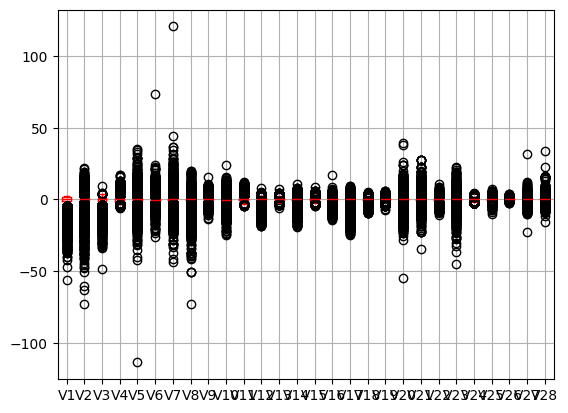

In [128]:
dfb=df.boxplot(column = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],color = 'red')
dfb.plot()
plt.show()

### **3.4. Relación Entre Variables**
---

- Analice si existe alguna relación entre las variables. Puede utilizar medidas de correlación o visualizaciones.
- Identifique si hay redundancia entre las variables para una posterior eliminación o selección.

Se procede a revisar la correlación entre las variables Class y las variables Amount y Time, se encuentra que no hay una relación lineal entre las variables.

Adicionalmente con la matriz de correlaciones se puede evidenciar que no hay correlación alta entre la variable objetivo y las demás variables, tampoco es altamente significativa entre las demás variables.

No se puede evidenciar que haya redundancia entre las variables.

<Axes: xlabel='Amount', ylabel='Time'>

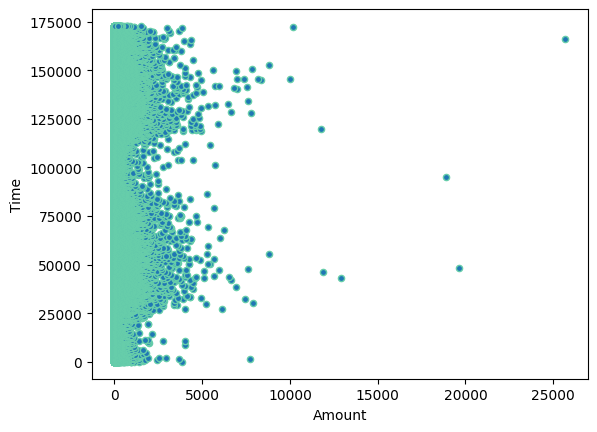

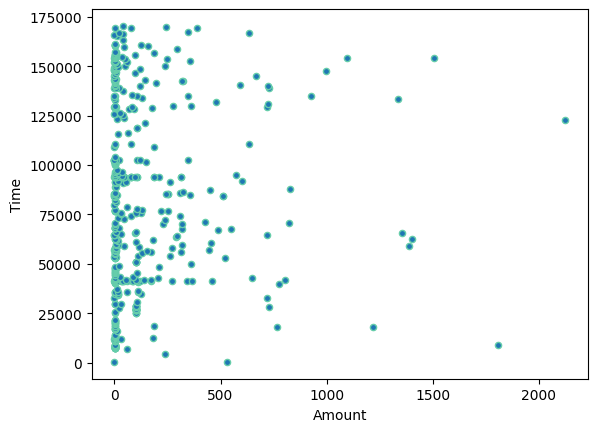

In [129]:
df[df.Class == 0].plot.scatter('Amount','Time',edgecolors="mediumaquamarine")
df[df.Class == 1].plot.scatter('Amount','Time',edgecolors="mediumaquamarine")

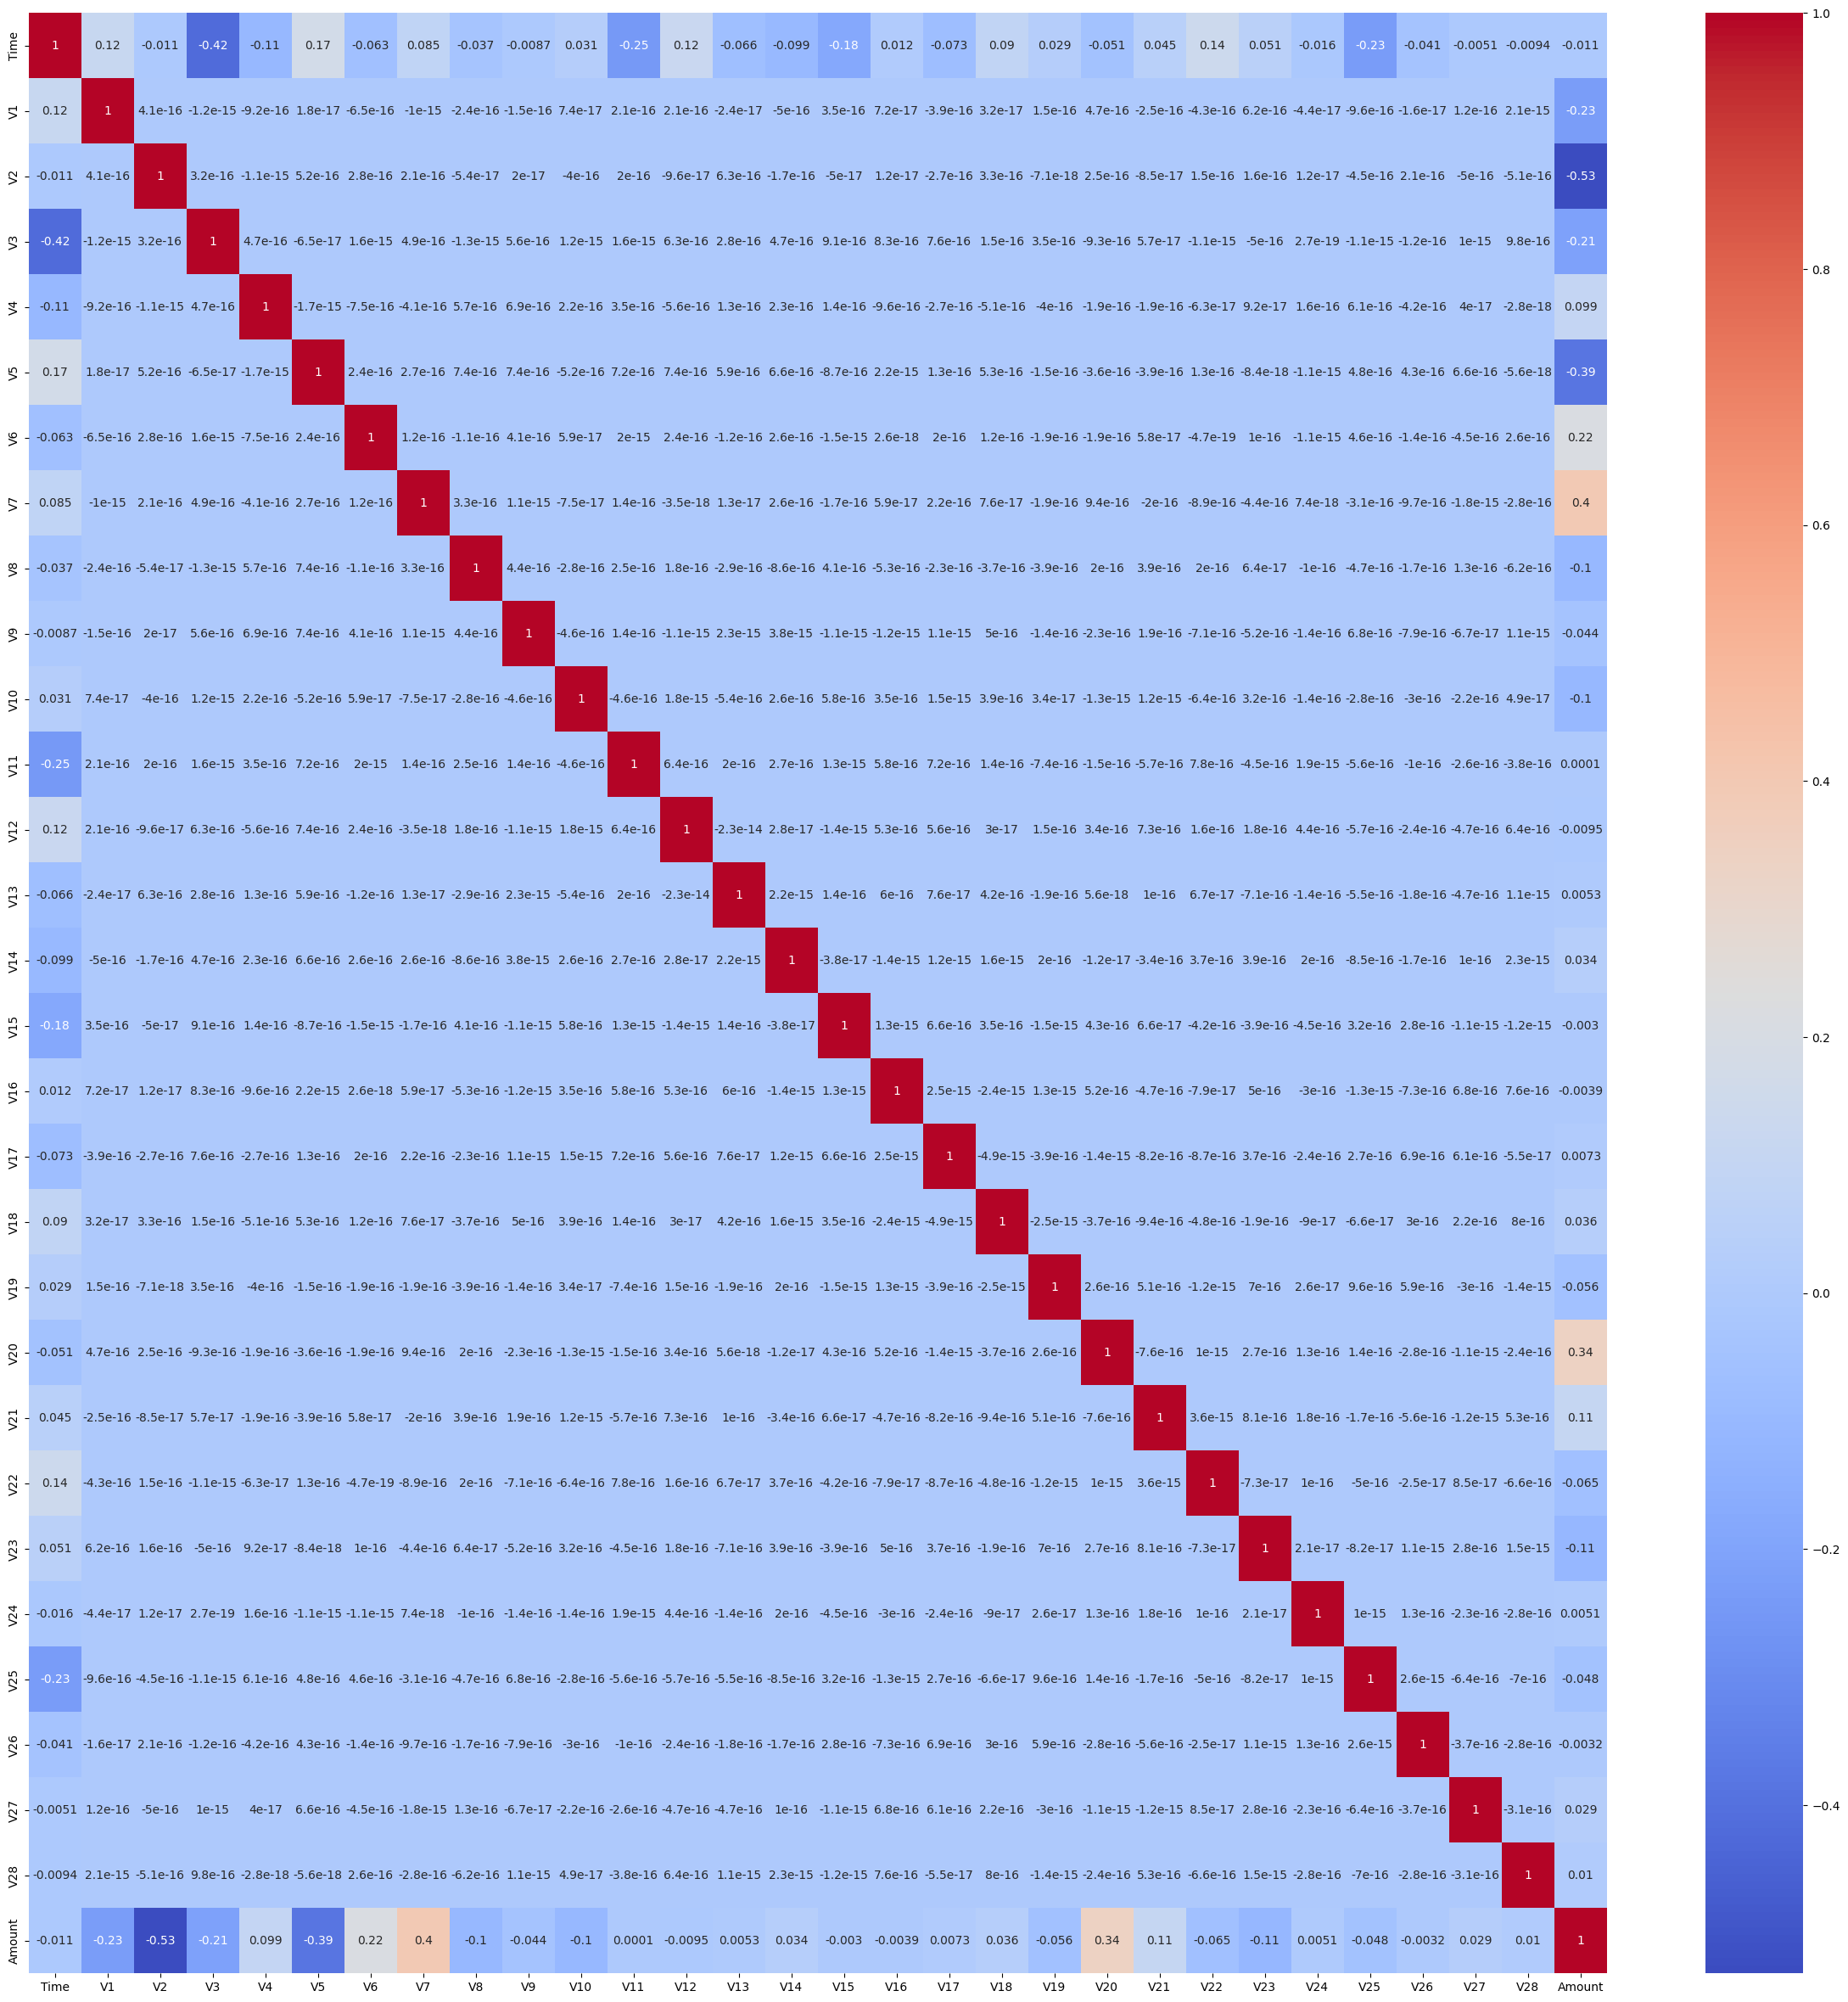

In [130]:
x = df.drop('Class', axis=1)
y = df.Class.values
#
matrix_Corr = x.corr()
plt.figure(figsize=(30,30))
sns.heatmap(matrix_Corr, annot = True,cmap="coolwarm")
plt.show()

## **4. Limpieza de los Datos**
---

La selección de las técnicas de preprocesamiento puede variar en cada conjunto de datos. Recuerde que puede aplicar (no necesariamente todas) las técnicas generales vistas en el curso, dependiendo si está trabajando con imagenes, datos estructurados, textos, etc.

No se requiere limpieza de la información ya que los datos no presentan información inconsistente, sin embargo si se requiere aumentar el número de muestras debido al desequilibrio que existe y para ello se realizara submuestreo y sobremuestreo

# **Diseño e implementación experimental**
---


## **5. Particion del conjunto de datos**
---

Si el dataset no tiene por defecto definida una partición en conjuntos de entrenamiento y prueba, hágala usted, en las proporciones que considere oportunas.

## **6. Selección y diseño de modelos**
---

Seleccione el/los modelo/s a explorar para aplicar sobre el conjunto de datos. Recuerde, la selección del modelo está influenciada por diferentes factores. Si el problema es de análisis de imagen, muy seguramente hay que explorar diversas redes neuronales convolucionales. Si el problema está relacionado con NLP, muy seguramente hay que explorar modelos basados en Tranformers.

Además, debe definir cuál es su problema:

- **Regresión**: se busca estimar un valor continúo a partir de los datos.
- **Clasificación**: permite estimar un valor categórico a partir de los datos.
- **Agrupamiento**: permite encontrar grupos de datos similares.
- **Otros modelos**: recuerde que dispone de otros tipos de tareas supervisadas y no supervisadas.

En cualquier caso los profundos disponibles en _TensorFlow_ constituyen una base sobre la que usted debe definir un clasificador/regresor/_encoder_/_decoder_ final, compuesto de una o más capas densas, con opción de incluir _dropout_ o capas de normalización. 

Justifique la escogencia y diseño de los modelos a explorar:

Dado que se tiene la variable objetivo class, que esta es categórica y que puede ser explicada por las demás variables que son de tipo numérico, se procederá a ajustar un modelo de regresión logística y se utilizaran técnicas usando las herramientas de TensorFlow

## **7. Implementación de los modelos**
---

Implemente los modelos descritos anteriormente usando herramientas de _TensorFlow_. Recuerde que puede aplicar técnicas de aumentación de datos, si es necesario.

A continuación, se realizará submuestreo y sobremuestreo en la información para balancear los datos y proceder a ajustar el modelo

In [131]:
legaldf = df[df.Class == 0]
fraudedf = df[df.Class == 1]

muestra1 = round(legaldf.shape[0] * 0.05)
muestra1

from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

legaldf2 = resample(legaldf, n_samples=muestra1, random_state=15)
muestra = pd.concat([legaldf2,fraudedf],axis=0)

muestrax = muestra.drop('Class', axis=1)
muestray = muestra.Class

ROS = RandomOverSampler(random_state=42)

x,y = ROS.fit_resample(muestrax,muestray)
y.value_counts()

0    14216
1    14216
Name: Class, dtype: int64

In [132]:
from sklearn.model_selection import train_test_split, KFold
x_train,x_test,y_train,y_test = train_test_split(x,y, stratify=y, random_state=12)

In [133]:
y_train.value_counts(), y_test.value_counts()

(0    10662
 1    10662
 Name: Class, dtype: int64,
 1    3554
 0    3554
 Name: Class, dtype: int64)

**Implementación de modelo usando herramientas de TensorFlow**

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [135]:
def create_model():
    modelo = Sequential()
    modelo.add(Dense(256,activation='relu',input_shape=[30]))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(256,activation='relu'))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(128,activation='relu'))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(64,activation='relu'))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(64,activation='relu'))
    modelo.add(Dropout(0.1))
    modelo.add(Dense(1,activation='sigmoid'))

    modelo.compile( optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    return modelo

In [136]:
Modelo_clasf = create_model()
Modelo_clasf.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 256)               7936      
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 256)               65792     
                                                                 
 dropout_26 (Dropout)        (None, 256)               0         
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 64)               

# **Entrenamiento y Validación**
---


## **8. Entrenamiento del Modelo y Selección de Hiperparámetros**
---

Si está utilizando un modelo que requiere entrenamiento, deberá entrenarlo y seleccionar un conjunto de hiperparámetros válido para el mismo. Recuerde que tiene diversas erramientas para hacer validación.

In [137]:
early_stopp = EarlyStopping(patience = 20, min_delta = 0.001, 
                                               restore_best_weights =True )

In [138]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

escalado = StandardScaler()

x_train_escalado = escalado.fit_transform(x_train)
x_test_escalado = escalado.transform(x_test)

In [149]:
historico = Modelo_clasf.fit(x_train_escalado,
            y_train,
            epochs=500,
            validation_split=0.25,
            callbacks=[early_stopp],
            verbose=1)

Epoch 1/500
500/500 [==============================] - 6s 7ms/step - loss: 0.1615 - accuracy: 0.9415 - val_loss: 0.0984 - val_accuracy: 0.9645
Epoch 2/500
500/500 [==============================] - 3s 6ms/step - loss: 0.0832 - accuracy: 0.9677 - val_loss: 0.0764 - val_accuracy: 0.9719
Epoch 3/500
500/500 [==============================] - 3s 7ms/step - loss: 0.0508 - accuracy: 0.9809 - val_loss: 0.0428 - val_accuracy: 0.9867
Epoch 4/500
500/500 [==============================] - 5s 9ms/step - loss: 0.0372 - accuracy: 0.9871 - val_loss: 0.0251 - val_accuracy: 0.9929
Epoch 5/500
500/500 [==============================] - 3s 6ms/step - loss: 0.0318 - accuracy: 0.9892 - val_loss: 0.0240 - val_accuracy: 0.9932
Epoch 6/500
500/500 [==============================] - 3s 7ms/step - loss: 0.0292 - accuracy: 0.9903 - val_loss: 0.0222 - val_accuracy: 0.9927
Epoch 7/500
500/500 [==============================] - 4s 8ms/step - loss: 0.0190 - accuracy: 0.9934 - val_loss: 0.0236 - val_accuracy: 0.9917

## **9. Evaluación o Aplicación del modelo**
---

Si entrenó un modelo, recuerde que debe reportar el desempeño del mismo sobre un conjunto de datos no visto (test). Considere que dispone de las siguientes métricas:

- **Clasificación**: accuracy, precision, recall, f1-score, AUC.
- **Regresión**: $r^2$, error cuadrático medio, error absoluto medio.
- **Agrupamiento**: coeficiente de silueta, índice de Davies-Bouldin.

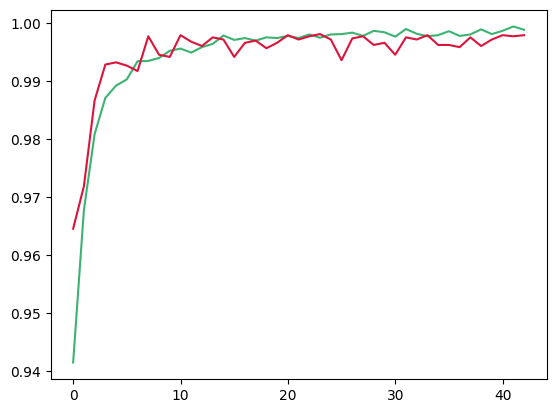

In [153]:
plt.plot(historico.history['accuracy'],color = "mediumseagreen")
plt.plot(historico.history['val_accuracy'],color = "crimson")
plt.show()

Adicionalmente, si utilizó un modelo pre-entrenado, debe generar predicciones y mostrar el resultado final de la aplicación del modelo sobre sus datos:

In [154]:
y_pred = Modelo_clasf.predict(x_test_escalado)

223/223 [==============================] - 1s 2ms/step


In [155]:
for i in range(len(y_pred)):
    if y_pred[i] > 0.5 :
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [156]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y, pred, model_name):
    cm = metrics.confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoria = ['No Fraude','Fraude']
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Etiquetas reales')
    plt.xlabel('Estimado')
    ticks = np.arange(len(categoria))
    plt.xticks(ticks, categoria, rotation=45)
    plt.yticks(ticks, categoria)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [157]:
def Plot_roc_curve(y, y_prob, model_name, score):
    plt.title(f'ROC Curve - {model_name}')
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr,tpr,label="Test, auc="+str(score))
    plt.legend(loc=4)
    plt.show()

In [158]:
columnas = ['Modelo','accuracy score', ' Precision','Recall','f1_score']
evaluacion_df = pd.DataFrame(columns=columnas)
evaluacion_df

,Modelo,accuracy score,Precision,Recall,f1_score


In [159]:
import sklearn.metrics as metrics
def print_results(model_name, y_test, y_pred, pred_prob=None):
    print(model_name)
    print('--------------------------------------------------------------------------')
 
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    
    accuracy_score  = metrics.accuracy_score(y_test,y_pred)
    print(f'accuracy score :{accuracy_score}') 

    f1_score = metrics.f1_score(y_test,y_pred)
    
    classification_report = metrics.classification_report(y_test,y_pred)
    print(classification_report)
    
#   save scores into dataframe for comparison
    evaluacion_df.loc[len(evaluacion_df.index)] = [model_name,accuracy_score,precision_score,recall_score, f1_score]
    
    Plot_confusion_matrix(y_test,y_pred,model_name)
    
    if pred_prob is not None:
        Plot_roc_curve(y_test,pred_prob,model_name,accuracy_score)

ANN 
--------------------------------------------------------------------------
accuracy score :0.9978897017445132
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3554
           1       1.00      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



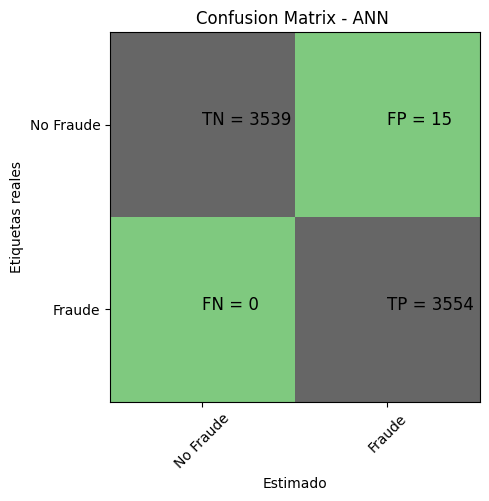

In [160]:
print_results("ANN ", y_test, y_pred)

In [161]:
evaluacion_df

,Modelo,accuracy score,Precision,Recall,f1_score
0,ANN,0.99789,0.995797,1.0,0.997894


## **Créditos**

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistentes docentes :**
  * [Juan Sebastián Lara Ramírez](https://sites.google.com/unal.edu.co/santiagotoledo-cortes/) 
* **Diseño de imágenes:**
    - [Mario Andres Rodriguez Triana](https://www.linkedin.com/in/mario-andres-rodriguez-triana-394806145/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*